# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Part a
First, you need to provide all the data information. In this section, consider the following:

1. Size of the data: This will give you an idea of how many samples you're working with.

2. Check whether any features have been removed in each sample: This will help you understand if there's any missing data that needs to be addressed.

3. Check the balance of the two classes: It's important to know if your classes are balanced or imbalanced, as this can affect the performance of your model.

4. Draw a distribution chart of age and gender for each class: Visualizing your data can give you insights that might not be apparent from just looking at numbers. In this case, you'll create a total of four charts - one for each combination of class (positive/negative) and feature (age/gender).



   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
---------------------------------------------------------

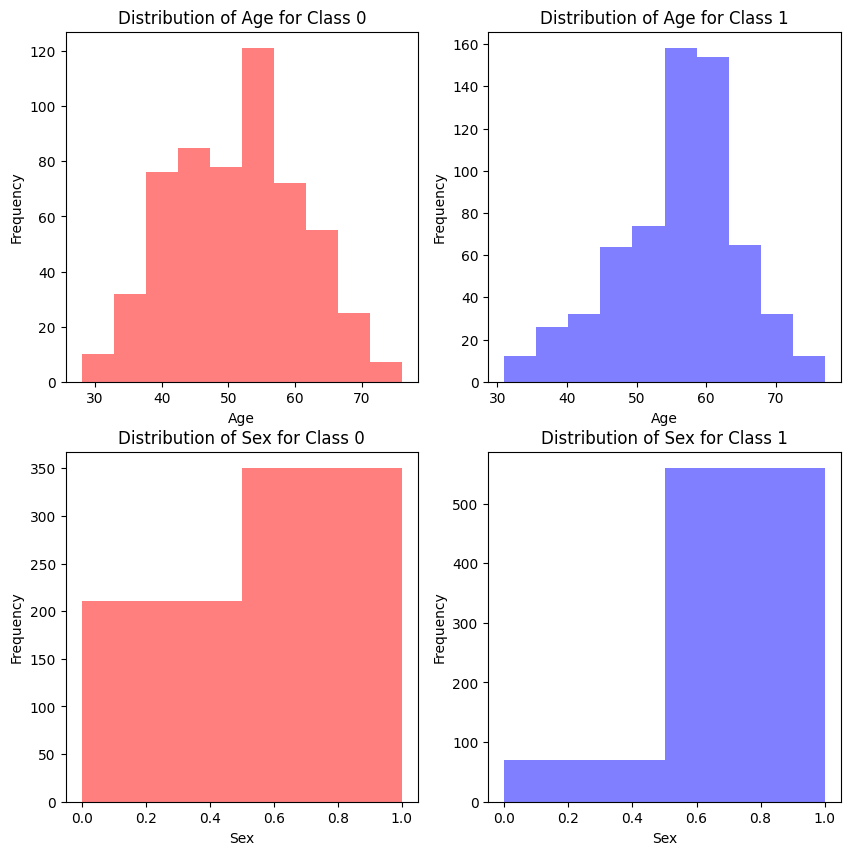

In [3]:

df = pd.read_csv('Heart_Disease_Dataset.csv')
print(df.head())
print('---------------------------------------------------------')
# (i) Print the shape of the data
print('The data has', df.shape[0], 'rows and', df.shape[1], 'columns.')

# (ii) Check for missing values
print('The number of missing values in each column is:')
print(df.isnull().sum())

# (iii) Check the balance of the classes
print('The distribution of the target variable is:')
print(df['target'].value_counts())

# (iv) Plot the distribution of age and sex for each class
fig, axes = plt.subplots(2, 2, figsize=(10, 10))


axes[0, 0].hist(df[df['target'] == 0]['age'], bins=10, color='red', alpha=0.5)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Age for Class 0')


axes[0, 1].hist(df[df['target'] == 1]['age'], bins=10, color='blue', alpha=0.5)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Age for Class 1')


axes[1, 0].hist(df[df['target'] == 0]['sex'], bins=2, color='red', alpha=0.5)
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Sex for Class 0')


axes[1, 1].hist(df[df['target'] == 1]['sex'], bins=2, color='blue', alpha=0.5)
axes[1, 1].set_xlabel('Sex')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Sex for Class 1')


plt.show()


# part b
In this section, using the Z-test, remove the outlier data. For this section, consider the Z-test threshold to be 3 and report which data are outliers. Also report the final size after removing this data.

In [5]:
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()


outliers = (z_scores.abs() > 3).any(axis=1)


print('The indices of the outliers are:')
print(outliers[outliers == True].index)


df_clean = df[~outliers]


print('The final size of the dataframe after removing outliers is:')
print(df_clean.shape)

The indices of the outliers are:
Int64Index([  30,   76,  109,  149,  167,  242,  325,  366,  371,  391,  400,
             450,  593,  618,  704,  734,  761,  773,  793,  852,  978, 1010,
            1013, 1039, 1070, 1075, 1078, 1172],
           dtype='int64')
The final size of the dataframe after removing outliers is:
(1162, 12)


# part c
For this section, you need to normalize numerical data (place it between zero and one).

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])


print(df_clean)

           age  sex  chest pain type  resting bp s  cholesterol  \
0     0.244898    1                2      0.571429     0.588595   
1     0.428571    0                3      0.761905     0.366599   
2     0.183673    1                2      0.476190     0.576375   
3     0.408163    0                4      0.552381     0.435845   
4     0.530612    1                3      0.666667     0.397149   
...        ...  ...              ...           ...          ...   
1185  0.346939    1                1      0.285714     0.537678   
1186  0.816327    1                4      0.609524     0.393075   
1187  0.591837    1                4      0.476190     0.266802   
1188  0.591837    0                2      0.476190     0.480652   
1189  0.204082    1                3      0.552381     0.356415   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0        0.777778                0   
1                       0            0       

<ipython-input-6-21d1e42d628f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])


# part d
In this section, first separate 70% of the data for training and the rest for testing. Now we want to train with three different kernels using the SVM algorithm:

i. Linear kernel

ii. RBF kernel

iii. Polynomial kernel

For each kernel, change the parameters in a way to get the highest percentage. For the RBF kernel, change the gamma parameter in a way to reach a minimum accuracy of 85 percent. Also, for the polynomial kernel, you can change the degree parameter. For each kernel, report the Accuracy, Precision, Recall, and F1 score results.

In [7]:
y = df_clean['target']
X = df_clean.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_kernel(kernel, **kwargs):

  model = SVC(kernel=kernel, **kwargs)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f'Kernel: {kernel}')
  print(f'Accuracy: {acc:.2f}')
  print(f'Precision: {prec:.2f}')
  print(f'Recall: {rec:.2f}')
  print(f'F1-score: {f1:.2f}')
  print('---------------------')



evaluate_kernel('linear')


gammas = [0.01, 0.1, 1, 10]
for gamma in gammas:
  print(f'gamma = {gamma}')
  evaluate_kernel('rbf', gamma=gamma)


degrees = [2, 3, 4]
for degree in degrees:
  print(f'degree = {degree}')
  evaluate_kernel('poly', degree=degree)


Kernel: linear
Accuracy: 0.83
Precision: 0.80
Recall: 0.90
F1-score: 0.85
---------------------
gamma = 0.01
Kernel: rbf
Accuracy: 0.83
Precision: 0.81
Recall: 0.88
F1-score: 0.84
---------------------
gamma = 0.1
Kernel: rbf
Accuracy: 0.85
Precision: 0.81
Recall: 0.92
F1-score: 0.86
---------------------
gamma = 1
Kernel: rbf
Accuracy: 0.86
Precision: 0.82
Recall: 0.93
F1-score: 0.87
---------------------
gamma = 10
Kernel: rbf
Accuracy: 0.85
Precision: 0.78
Recall: 0.98
F1-score: 0.87
---------------------
degree = 2
Kernel: poly
Accuracy: 0.83
Precision: 0.82
Recall: 0.87
F1-score: 0.84
---------------------
degree = 3
Kernel: poly
Accuracy: 0.84
Precision: 0.82
Recall: 0.88
F1-score: 0.85
---------------------
degree = 4
Kernel: poly
Accuracy: 0.83
Precision: 0.82
Recall: 0.87
F1-score: 0.84
---------------------
